<div style="
  padding: 18px 24px;
  margin-top: 15px;
  margin-bottom: 25px;
  border-left: 6px solid var(--jp-info-color0);
  background: var(--jp-layout-color2);
  border-radius: 8px;
">
<h1 style="margin:0; color:var(--jp-ui-font-color1);">
04. Exploratory Data Analysis
</h1>
<p style="font-size: 1.1em; color: var(--jp-ui-font-color1); margin-top: 6px;">
Разведочный анализ данных
</p>
</div>


<h2 style="
  padding: 6px 0;
  border-bottom: 2px solid var(--jp-border-color2);
  /* color: var(--jp-ui-font-color1); */
  margin-top: 32px;
">
04.1 Корреляционная матрица phi k
</h2>

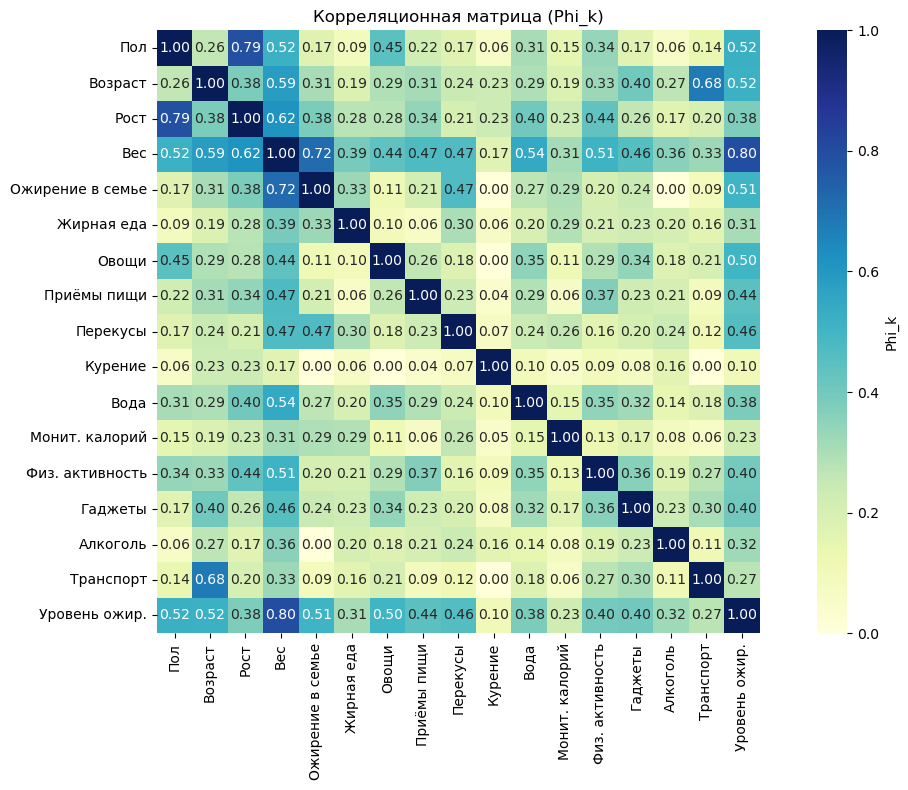

In [10]:
import seaborn as sns
import phik
import matplotlib.pyplot as plt
from utils import load_clean_df

df_named = load_clean_df('short_names')

numeric_short_columns = df_named.select_dtypes(include=["number"]).columns.tolist()
phik_matrix = df_named.phik_matrix(interval_cols=numeric_short_columns)

plt.figure(figsize=(12, 8))
sns.heatmap(
    phik_matrix,
    cmap="YlGnBu",
    vmin=0,
    vmax=1,
    square=True,
    annot=True,
    fmt=".2f",
    cbar_kws={"label": "Phi_k"},
)
plt.title("Корреляционная матрица (Phi_k)")
plt.tight_layout()
plt.show()



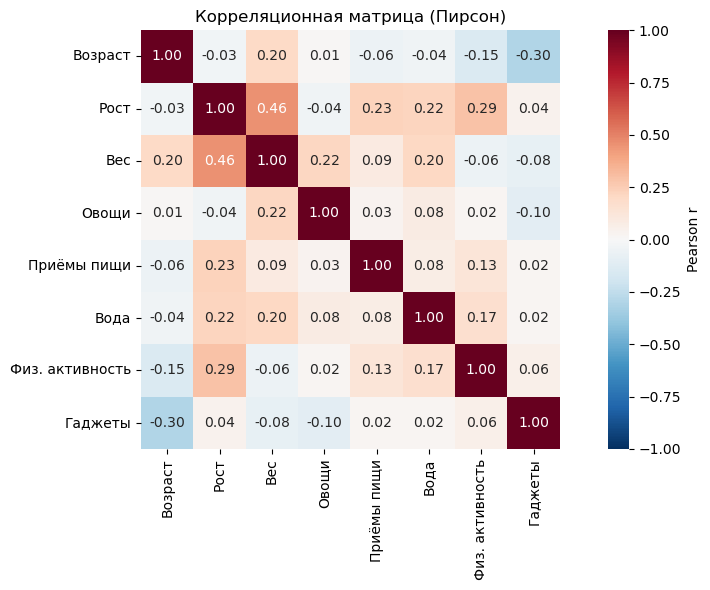

In [12]:
import seaborn as sns
import pandas as pd

numeric_only = df_named.apply(pd.to_numeric, errors="coerce")
numeric_only = numeric_only.dropna(axis=1, how="all")
pearson_corr = numeric_only.corr(method="pearson")

plt.figure(figsize=(10, 6))
sns.heatmap(
    pearson_corr,
    cmap="RdBu_r",
    vmin=-1,
    vmax=1,
    center=0,
    annot=True,
    fmt=".2f",
    square=True,
    cbar_kws={"label": "Pearson r"},
)
plt.title("Корреляционная матрица (Пирсон)")
plt.tight_layout()
plt.show()
